In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

pisa_bgr = cv2.imread("PISA.jpg", 1)
pisa = cv2.cvtColor(pisa_bgr, cv2.COLOR_BGR2RGB)

In [2]:
def BLIR(img,ang, point):  
    rad = (math.pi*ang)/180 
    w, h, l = img.shape
    xr = point[0]//2
    yr = point[1]//2
    cosine = math.cos(rad)
    sine = math.sin(rad)
    res = np.zeros((w,h,l))    
    for k in range(l):
        for i in range(w):
            for j in range(h):
                    x = int((i - xr)*cosine - (j - yr)*sine)
                    y = int((i - xr)*sine + (j - yr)*cosine)
                    xa = math.floor(x)
                    ya = math.floor(y)
                    a = x-xa
                    b = y-ya
                    idx_x = xa + xr
                    idx_y = ya + yr
                    if i+1<w and j+1<h and idx_x>=0 and idx_y>=0 and idx_x<w and idx_y<h:
                        res[idx_x][idx_y][k] = (1-a)*(1-b)*img[i][j][k] + (1-a)*b*img[i][j+1][k] + (1-b)*a*img[i+1][j][k] + a*b*img[i+1][j+1][k]
                    if i+1 >= w and j+1<h and idx_x>=0 and idx_y>=0 and idx_x<w and idx_y<h:
                        res[idx_x][idx_y][k] = (1-a)*(1-b)*img[i][j][k] + (1-a)*b*img[i][j+1][k]
                    if i+1 < w and j+1 >= h and idx_x>=0 and idx_y>=0 and idx_x<w and idx_y<h:
                        res[idx_x][idx_y][k] = (1-a)*(1-b)*img[i][j][k] + (1-b)*a*img[i+1][j][k]
    return res.astype(np.int32)


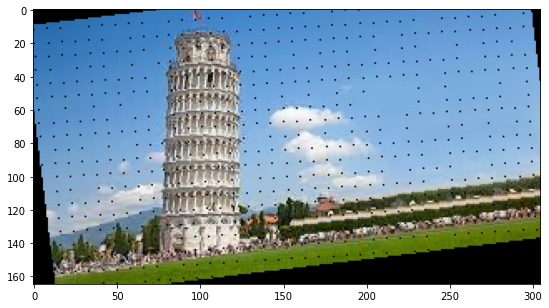

In [3]:
ang = 7
img = pisa
point = (113, 153)
res = BLIR(img,ang, point)
plt.figure(figsize=(20,20))
plt.subplot(1,2,2)
plt.imshow(res)
plt.show()